In [11]:
import glob
import os

def get_list_of_files(source_path:str):
	train_files= glob.glob(source_path+'train*.png')
	train_files = [(int(i[len(source_path)+5:-4]), i) for i in glob.glob(source_path+'train*.png')]
	train_files.sort()
	return train_files


(224, 224)


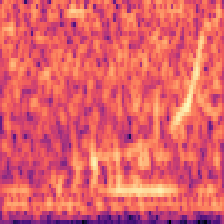

In [12]:
# Open images
from PIL import Image 
folder = './2000-samples'
# folder = './train_png'
files = get_list_of_files(f'{folder}/')

img = Image.open(files[0][1])
print(img.size)
img


In [13]:
# Get labels
import numpy as np
try:
	y = np.load('../numpy/train_png/y.npy')
except:
	raise ValueError('Can not find the labels, make sure you have followed the steps in the /input/numpy folder readme')
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))


{0: 22973, 1: 7027}

In [14]:
# make destination folders
new_folder = folder + '-bined'
if not os.path.exists(new_folder):
	os.makedirs(new_folder)
	os.makedirs(new_folder + '/no whale')
	os.makedirs(new_folder + '/whale present')

In [15]:
for i in range(len(files)):
	if y[i] == 0:
		os.system(f'cp {files[i][1]} {new_folder}/no\ whale/')
	else:
		os.system(f'cp {files[i][1]} {new_folder}/whale\ present/')

print('No whale:', len(glob.glob(new_folder + '/no whale/*')))
print('Whale present:', len(glob.glob(new_folder + '/whale present/*')))

No whale: 1804
Whale present: 196
